# Purpose of the Project
#### The purpose of this project is to help a business understand its customer base, optimize product offerings, and enhance marketing and sales strategies.

# **Load and Understanding the Data Structure**
## This section loads the dataset and provides an initial look to understand its structure, data types, and any potential issues like missing values or duplicates.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/shopping_trends.csv')

In [16]:
# Preview the first few rows of the data
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [17]:
# Overview of the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [18]:
# Summary statistics of numerical columns
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [19]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [20]:
# Check for missing duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


# **Exploratory Data Analysis (EDA)**
## This section provides an exploratory look at the customer data to uncover patterns and insights.

## **Demographic Insights to Understand the Customer Base**
## This subsection explores basic demographic attributes such as age and gender to understand the composition of the customer base.

# ### Age Distribution


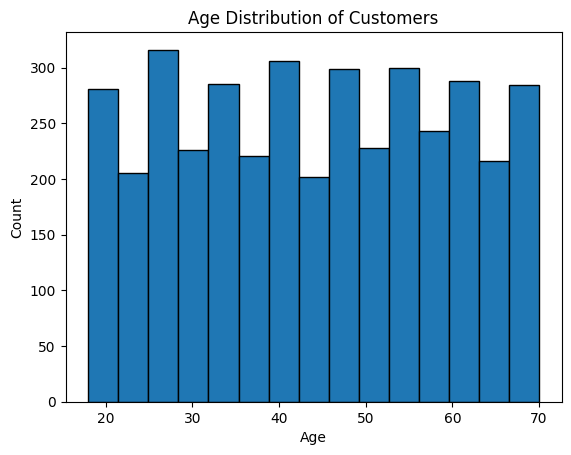

In [21]:
# Analyze the age distribution of customers to identify the most active age groups.
plt.hist(df['Age'], bins=15, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of Customers')
plt.show()

## Interpretation:
## The age distribution is relatively balanced across all age groups, indicating no single age range dominates the customer base.

# ### Gender Distribution

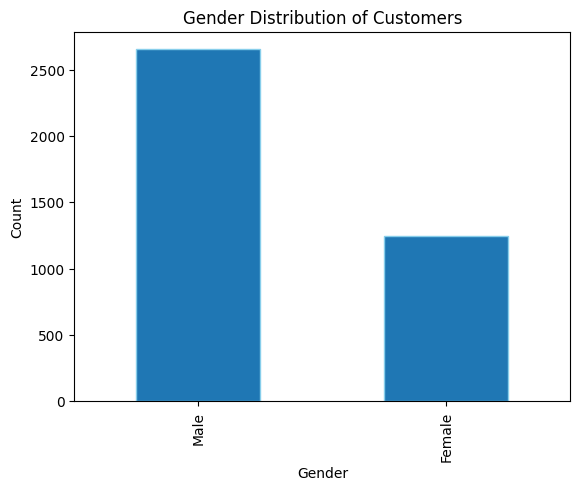

In [22]:
# Check the distribution between genders in the customer base.
df['Gender'].value_counts().plot(kind='bar', edgecolor='skyblue')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Customers')
plt.show()

## Interpretation:
## The gender distribution indicates that there are more male customers than female customers in this dataset.

## **Spending Patterns by Demographics**
## Understanding spending habits across different demographics can help target marketing strategies effectively.

# ### Average Purchase Amount by Age

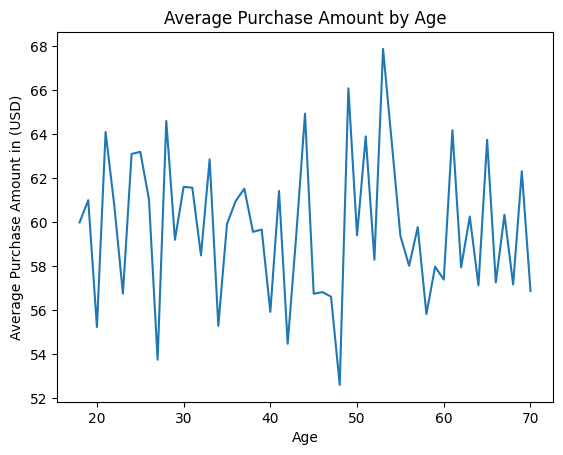

In [23]:
# Analyzing the average purchase amount across different age groups to see which groups tend to spend more.
df.groupby('Age')['Purchase Amount (USD)'].mean().plot(kind='line')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount in (USD)')
plt.title('Average Purchase Amount by Age')
plt.show()

## Interpretation:
## Spending varies significantly across ages, with some peaks around middle-aged groups. This could suggest higher spending potential in these age ranges.

# ### Average Purchase Amount by Gender

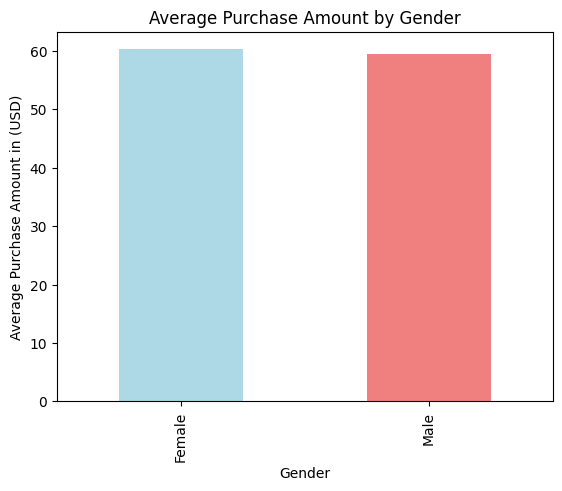

In [24]:
# Comparing the average purchase amount between male and female customers.
df.groupby('Gender')['Purchase Amount (USD)'].mean().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount in (USD)')
plt.title('Average Purchase Amount by Gender')
plt.show()

## Interpretation:
## Males constitute 68% of the customer base, while females make up 32%. Despite the larger number of male customers, females have a slightly higher average purchase amount per transaction. This suggests that female customers, though fewer, tend to spend more on each purchase.

## **Popular Products and Categories**
## This section analyzes the most popular items and categories purchased, which can help in inventory and product planning.

# ### Top 5 Purchased Items

In [25]:
# Display the five most frequently purchased items to see which items are most popular among customers.
top_items = df['Item Purchased'].value_counts().head(5)
print("Top 5 Most Purchased Items:\n", top_items)

Top 5 Most Purchased Items:
 Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64


## Interpretation:
## The top purchased items include Blouse, Jewelry, and Pants, which are popular among customers and could indicate demand for these products.

# ### Top 5 Categories

In [26]:
# Display the five most popular product categories.
top_categories = df['Category'].value_counts().head(5)
print("Top 5 Categories:\n", top_categories)

Top 5 Categories:
 Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


## Interpretation:
## Clothing is the most popular category, followed by Accessories. These insights can be used to focus on specific product lines.

## **Seasonal Trends**
## This section examines seasonal patterns in spending, which can inform seasonal promotions and marketing campaigns.

# ### Total Purchase Amount by Season

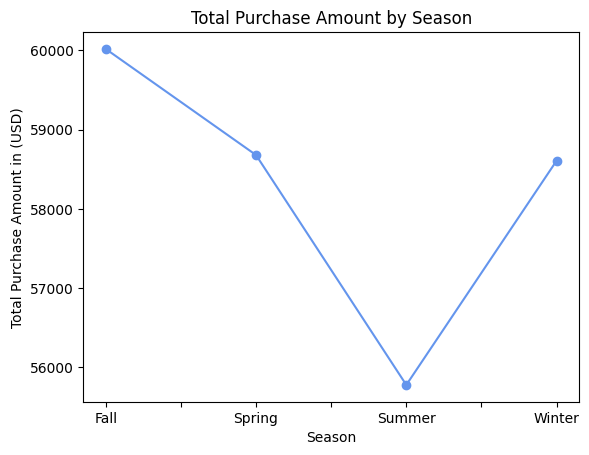

In [27]:
# Analyze total spending across different seasons to identify high-revenue periods.
df.groupby('Season')['Purchase Amount (USD)'].sum().plot(kind='line', marker='o', color='cornflowerblue')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount in (USD)')
plt.title('Total Purchase Amount by Season')
plt.show()

## Interpretation:
## Spending peaks in fall and winter, suggesting that these seasons may be ideal for focused marketing efforts or promotions.

## **Discount and Promotion Effects**
## This analysis explores the impact of discounts on customer buying behavior.

# ### Discount Usage Percentage

In [28]:
# Calculate and visualize the percentage of purchases that used discounts to assess the influence of promotions.
discount_usage = df['Discount Applied'].value_counts(normalize=True) * 100
print("Discount Usage Percentage:\n", discount_usage)

Discount Usage Percentage:
 Discount Applied
No     57.0
Yes    43.0
Name: proportion, dtype: float64


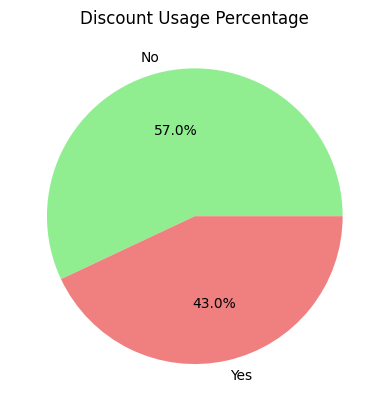

In [29]:
# Pie chart visualization of discount usage
(df['Discount Applied'].value_counts(normalize=True)*100).plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Discount Usage Percentage')
plt.ylabel('')
plt.show()

## Interpretation:
## The analysis shows that 43% of purchases involve a discount, while 57% do not. This indicates that a substantial portion of customers are influenced by discounts, though a slight majority still make purchases without them. Offering discounts might attract nearly half of the customer base, making promotions an effective strategy for encouraging purchases among discount-sensitive customers.

# **Concluding Summary**
## This project provided valuable insights into customer demographics, spending patterns, product popularity, seasonal trends, and the impact of discounts on purchasing behavior. Here are some key takeaways:

## - Spending varies across all age groups with some peaks around age 50, with females spending slightly more on average than males.
## - Clothing and Accessories are the most popular product categories.
## - Fall and winter seasons see the highest spending, suggesting potential for seasonal marketing.
## - A significant percentage of customers use discounts, indicating the effectiveness of promotions.

## **Recommendations**
## Based on the analysis, here are some actionable recommendations:
## - Consider tailoring marketing efforts to reach a broad age demographic, particularly in the fall and winter seasons.
## - Stock popular items like Blouses and Jewelry in higher quantities to meet demand.
## - Continue offering discounts, as a considerable portion of customers is responsive to promotions.
## - Consider targeted seasonal promotions for clothing and accessory items to maximize sales during peak spending seasons.